# Dependencies

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC, NuSVC
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

# Set seeds to make the experiment more reproducible.
from numpy.random import seed
seed(0)

%matplotlib inline
sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

# Load data

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

print('Train set shape:', train.shape)
print('Test set shape:', test.shape)
print('Train set overview:')
display(train.head())

Train set shape: (262144, 258)
Test set shape: (131073, 257)
Train set overview:


,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,...,beady-mauve-frog-distraction,surly-brass-maltese-ordinal,beady-asparagus-opossum-expert,beady-rust-impala-dummy,droopy-amethyst-dachshund-hint,homey-crimson-budgerigar-grandmaster,droopy-cardinal-impala-important,woozy-apricot-moose-hint,paltry-sapphire-labradoodle-dummy,crappy-carmine-eagle-entropy,greasy-magnolia-spider-grandmaster,crabby-carmine-flounder-sorted,skimpy-copper-fowl-grandmaster,hasty-seashell-woodpecker-hint,snappy-purple-bobcat-important,thirsty-carmine-corgi-ordinal,homely-auburn-reindeer-unsorted,crappy-beige-tiger-fepid,cranky-auburn-swan-novice,chewy-bistre-buzzard-expert,skinny-cyan-macaque-pembus,slimy-periwinkle-otter-expert,snazzy-burgundy-clam-novice,cozy-ochre-gorilla-gaussian,homey-sangria-wolfhound-dummy,snazzy-asparagus-hippopotamus-contributor,paltry-red-hamster-sorted,zippy-dandelion-insect-golden,baggy-coral-bandicoot-unsorted,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,-0.227027,0.575964,1.541908,1.745286,-0.624271,3.600958,1.176489,-0.182776,-0.228391,1.682263,-0.833236,-4.377688,-5.372410,-0.477742,-0.179005,-0.516475,0.127391,-0.857591,-0.461500,2.160303,-2.118371,0.515493,-1.201493,-0.027377,-1.154024,0.753204,-0.179651,-0.807341,-1.663626,0.893806,...,-1.829848,2.347131,0.082462,-1.012654,0.593752,2.904654,-0.428974,-0.919979,2.849575,-0.906744,0.729459,0.386140,0.319814,-0.407682,-0.170667,-1.242919,-1.719046,-0.132395,-0.368991,-5.112553,-2.085988,-0.897257,1.080671,-0.273262,0.342824,0.640177,-0.415298,-0.483126,-0.080799,2.416224,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,0.783980,-1.280579,-1.003480,-7.753201,-1.320547,0.919078,-1.036068,0.030213,0.910172,-0.905345,0.646641,-0.465291,-0.531735,-0.756781,0.193724,0.224277,-0.474412,1.885805,0.205439,-6.481422,1.035620,-0.453623,0.375936,-0.320670,-0.144646,-0.220129,0.577826,-0.360512,-0.600107,0.008111,...,0.982205,-1.161978,0.532269,1.133215,0.003503,-1.390962,0.158572,0.143794,-0.317185,1.017192,-0.395342,-0.642357,-0.627209,0.257271,-1.461564,0.325613,1.628369,0.640040,0.750735,1.164573,0.900373,0.063489,0.948158,0.273014,-1.269147,-0.251101,-2.271731,-0.044167,-0.443766,-1.144794,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.28855

# Model

## Model parameters

In [3]:
N_FOLDS = 3 #11

### You can find evaluation metrics for each model on each fold below on this cell output log. (It's hidden to keep the code clean)

In [4]:
# INITIALIZE VARIABLES
cols = [c for c in train.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic', 'preds']]
test['target_vt_stdv'] = 0
train['preds_vt_stdv'] = 0
test['target_vt_minmax'] = 0
train['preds_vt_minmax'] = 0
test['target_vt_ns'] = 0
train['preds_vt_ns'] = 0
test['target_stdv'] = 0
train['preds_stdv'] = 0
test['target_minmax'] = 0
train['preds_minmax'] = 0
test['target_ns'] = 0
train['preds_ns'] = 0


# BUILD 512 MODELS
for i in range(512):
    print('wheezy-copper-turtle-magic {}\n'.format(i))

    # EXTRACT SUBSET OF DATASET WHERE WHEEZY-MAGIC EQUALS I
    train2 = train[train['wheezy-copper-turtle-magic']==i]
    test2 = test[test['wheezy-copper-turtle-magic']==i]
    idx1 = train2.index
    idx2 = test2.index
    train2.reset_index(drop=True, inplace=True)

#     data = pd.concat([pd.DataFrame(train2[cols]), pd.DataFrame(test2[cols])])
#     data2 = StandardScaler().fit_transform(PCA(svd_solver='full',n_components='mle').fit_transform(data[cols]))
#     train3 = data2[:train2.shape[0]]
#     test3 = data2[train2.shape[0]:]
    sel = VarianceThreshold(threshold=2).fit(train2[cols])
    train3 = sel.transform(train2[cols])
    test3 = sel.transform(test2[cols])
    scaler = StandardScaler().fit(train3)
    train3 = scaler.transform(train3)
    test3 = scaler.transform(test3)

    skf = StratifiedKFold(n_splits=N_FOLDS, random_state=0)
    counter = 0

    for train_index, val_index in skf.split(train3, train2['target']):
        counter += 1
        print('Fold {}\n'.format(counter))

        model = QuadraticDiscriminantAnalysis()
        model.fit(train3[train_index,:], train2.loc[train_index]['target'])

        train_predictions = model.predict(train3[train_index,:])
        val_predictions = model.predict(train3[val_index,:])

        train_auc = roc_auc_score(train2.loc[train_index]['target'], train_predictions) * 100
        val_auc = roc_auc_score(train2.loc[val_index]['target'], val_predictions) * 100
        train_precision = precision_score(train2.loc[train_index]['target'], train_predictions) * 100
        val_precision = precision_score(train2.loc[val_index]['target'], val_predictions) * 100
        train_recall = recall_score(train2.loc[train_index]['target'], train_predictions) * 100
        val_recall = recall_score(train2.loc[val_index]['target'], val_predictions) * 100
        print('-----Train----------')
        print('AUC: %.2f Precision: %.2f Recall: %.2f \n' % (train_auc, train_precision, train_recall))
        print('-----Validation-----')
        print('AUC: %.2f Precision: %.2f Recall: %.2f \n' % (val_auc, val_precision, val_recall))

        # Make predictions
        train['preds_vt_stdv'].loc[idx1] += model.predict_proba(train3)[:,1] / N_FOLDS
        test['target_vt_stdv'].loc[idx2] += model.predict_proba(test3)[:,1] / N_FOLDS

wheezy-copper-turtle-magic 0

Fold 1

-----Train----------
AUC: 98.88 Precision: 98.31 Recall: 99.43 

-----Validation-----
AUC: 89.35 Precision: 90.59 Recall: 87.50 

Fold 2

-----Train----------
AUC: 97.20 Precision: 96.61 Recall: 97.71 

-----Validation-----
AUC: 96.63 Precision: 96.59 Recall: 96.59 

Fold 3

-----Train----------
AUC: 97.77 Precision: 97.19 Recall: 98.30 

-----Validation-----
AUC: 89.73 Precision: 94.81 Recall: 83.91 

wheezy-copper-turtle-magic 1

Fold 1

-----Train----------
AUC: 97.12 Precision: 95.29 Recall: 98.78 

-----Validation-----
AUC: 92.93 Precision: 92.68 Recall: 92.68 

Fold 2

-----Train----------
AUC: 97.40 Precision: 95.86 Recall: 98.78 

-----Validation-----
AUC: 88.83 Precision: 87.95 Recall: 89.02 

Fold 3

-----Train----------
AUC: 98.01 Precision: 95.91 Recall: 100.00 

-----Validation-----
AUC: 91.75 Precision: 91.46 Recall: 91.46 

wheezy-copper-turtle-magic 2

Fold 1

-----Train----------
AUC: 97.88 Precision: 97.55 Recall: 98.15 

-----Val

In [5]:
# BUILD 512 MODELS
for i in range(512):
    print('wheezy-copper-turtle-magic {}\n'.format(i))

    # EXTRACT SUBSET OF DATASET WHERE WHEEZY-MAGIC EQUALS I
    train2 = train[train['wheezy-copper-turtle-magic']==i]
    test2 = test[test['wheezy-copper-turtle-magic']==i]
    idx1 = train2.index
    idx2 = test2.index
    train2.reset_index(drop=True, inplace=True)

    sel = VarianceThreshold(threshold=2).fit(train2[cols])
    train3 = sel.transform(train2[cols])
    test3 = sel.transform(test2[cols])
    scaler = MinMaxScaler().fit(train3)
    train3 = scaler.transform(train3)
    test3 = scaler.transform(test3)

    skf = StratifiedKFold(n_splits=N_FOLDS, random_state=0)
    counter = 0

    for train_index, val_index in skf.split(train3, train2['target']):
        counter += 1
        print('Fold {}\n'.format(counter))

        model = QuadraticDiscriminantAnalysis()
        model.fit(train3[train_index,:], train2.loc[train_index]['target'])

        train_predictions = model.predict(train3[train_index,:])
        val_predictions = model.predict(train3[val_index,:])

        train_auc = roc_auc_score(train2.loc[train_index]['target'], train_predictions) * 100
        val_auc = roc_auc_score(train2.loc[val_index]['target'], val_predictions) * 100
        train_precision = precision_score(train2.loc[train_index]['target'], train_predictions) * 100
        val_precision = precision_score(train2.loc[val_index]['target'], val_predictions) * 100
        train_recall = recall_score(train2.loc[train_index]['target'], train_predictions) * 100
        val_recall = recall_score(train2.loc[val_index]['target'], val_predictions) * 100
        print('-----Train----------')
        print('AUC: %.2f Precision: %.2f Recall: %.2f \n' % (train_auc, train_precision, train_recall))
        print('-----Validation-----')
        print('AUC: %.2f Precision: %.2f Recall: %.2f \n' % (val_auc, val_precision, val_recall))

        # Make predictions
        train['preds_vt_minmax'].loc[idx1] += model.predict_proba(train3)[:,1] / N_FOLDS
        test['target_vt_minmax'].loc[idx2] += model.predict_proba(test3)[:,1] / N_FOLDS

wheezy-copper-turtle-magic 0

Fold 1

-----Train----------
AUC: 98.88 Precision: 98.31 Recall: 99.43 

-----Validation-----
AUC: 89.35 Precision: 90.59 Recall: 87.50 

Fold 2

-----Train----------
AUC: 97.20 Precision: 96.61 Recall: 97.71 

-----Validation-----
AUC: 96.63 Precision: 96.59 Recall: 96.59 

Fold 3

-----Train----------
AUC: 97.77 Precision: 97.19 Recall: 98.30 

-----Validation-----
AUC: 89.73 Precision: 94.81 Recall: 83.91 

wheezy-copper-turtle-magic 1

Fold 1

-----Train----------
AUC: 97.12 Precision: 95.29 Recall: 98.78 

-----Validation-----
AUC: 92.93 Precision: 92.68 Recall: 92.68 

Fold 2

-----Train----------
AUC: 97.40 Precision: 95.86 Recall: 98.78 

-----Validation-----
AUC: 88.83 Precision: 87.95 Recall: 89.02 

Fold 3

-----Train----------
AUC: 98.01 Precision: 95.91 Recall: 100.00 

-----Validation-----
AUC: 91.75 Precision: 91.46 Recall: 91.46 

wheezy-copper-turtle-magic 2

Fold 1

-----Train----------
AUC: 97.88 Precision: 97.55 Recall: 98.15 

-----Val

In [6]:
# BUILD 512 MODELS
for i in range(512):
    print('wheezy-copper-turtle-magic {}\n'.format(i))

    # EXTRACT SUBSET OF DATASET WHERE WHEEZY-MAGIC EQUALS I
    train2 = train[train['wheezy-copper-turtle-magic']==i]
    test2 = test[test['wheezy-copper-turtle-magic']==i]
    idx1 = train2.index
    idx2 = test2.index
    train2.reset_index(drop=True, inplace=True)

    sel = VarianceThreshold(threshold=2).fit(train2[cols])
    train3 = sel.transform(train2[cols])
    test3 = sel.transform(test2[cols])

    skf = StratifiedKFold(n_splits=N_FOLDS, random_state=0)
    counter = 0

    for train_index, val_index in skf.split(train3, train2['target']):
        counter += 1
        print('Fold {}\n'.format(counter))

        model = QuadraticDiscriminantAnalysis()
        model.fit(train3[train_index,:], train2.loc[train_index]['target'])

        train_predictions = model.predict(train3[train_index,:])
        val_predictions = model.predict(train3[val_index,:])

        train_auc = roc_auc_score(train2.loc[train_index]['target'], train_predictions) * 100
        val_auc = roc_auc_score(train2.loc[val_index]['target'], val_predictions) * 100
        train_precision = precision_score(train2.loc[train_index]['target'], train_predictions) * 100
        val_precision = precision_score(train2.loc[val_index]['target'], val_predictions) * 100
        train_recall = recall_score(train2.loc[train_index]['target'], train_predictions) * 100
        val_recall = recall_score(train2.loc[val_index]['target'], val_predictions) * 100
        print('-----Train----------')
        print('AUC: %.2f Precision: %.2f Recall: %.2f \n' % (train_auc, train_precision, train_recall))
        print('-----Validation-----')
        print('AUC: %.2f Precision: %.2f Recall: %.2f \n' % (val_auc, val_precision, val_recall))

        # Make predictions
        train['preds_vt_ns'].loc[idx1] += model.predict_proba(train3)[:,1] / N_FOLDS
        test['target_vt_ns'].loc[idx2] += model.predict_proba(test3)[:,1] / N_FOLDS

wheezy-copper-turtle-magic 0

Fold 1

-----Train----------
AUC: 98.88 Precision: 98.31 Recall: 99.43 

-----Validation-----
AUC: 89.35 Precision: 90.59 Recall: 87.50 

Fold 2

-----Train----------
AUC: 97.20 Precision: 96.61 Recall: 97.71 

-----Validation-----
AUC: 96.63 Precision: 96.59 Recall: 96.59 

Fold 3

-----Train----------
AUC: 97.77 Precision: 97.19 Recall: 98.30 

-----Validation-----
AUC: 89.73 Precision: 94.81 Recall: 83.91 

wheezy-copper-turtle-magic 1

Fold 1

-----Train----------
AUC: 97.12 Precision: 95.29 Recall: 98.78 

-----Validation-----
AUC: 92.93 Precision: 92.68 Recall: 92.68 

Fold 2

-----Train----------
AUC: 97.40 Precision: 95.86 Recall: 98.78 

-----Validation-----
AUC: 88.83 Precision: 87.95 Recall: 89.02 

Fold 3

-----Train----------
AUC: 98.01 Precision: 95.91 Recall: 100.00 

-----Validation-----
AUC: 91.75 Precision: 91.46 Recall: 91.46 

wheezy-copper-turtle-magic 2

Fold 1

-----Train----------
AUC: 97.88 Precision: 97.55 Recall: 98.15 

-----Val

In [7]:
# BUILD 512 MODELS
for i in range(512):
    print('wheezy-copper-turtle-magic {}\n'.format(i))

    # EXTRACT SUBSET OF DATASET WHERE WHEEZY-MAGIC EQUALS I
    train2 = train[train['wheezy-copper-turtle-magic']==i]
    test2 = test[test['wheezy-copper-turtle-magic']==i]
    idx1 = train2.index
    idx2 = test2.index
    train2.reset_index(drop=True, inplace=True)

    scaler = StandardScaler().fit(train2[cols])
    train3 = scaler.transform(train2[cols])
    test3 = scaler.transform(test2[cols])

    skf = StratifiedKFold(n_splits=N_FOLDS, random_state=0)
    counter = 0

    for train_index, val_index in skf.split(train3, train2['target']):
        counter += 1
        print('Fold {}\n'.format(counter))

        model = QuadraticDiscriminantAnalysis()
        model.fit(train3[train_index,:], train2.loc[train_index]['target'])

        train_predictions = model.predict(train3[train_index,:])
        val_predictions = model.predict(train3[val_index,:])

        train_auc = roc_auc_score(train2.loc[train_index]['target'], train_predictions) * 100
        val_auc = roc_auc_score(train2.loc[val_index]['target'], val_predictions) * 100
        train_precision = precision_score(train2.loc[train_index]['target'], train_predictions) * 100
        val_precision = precision_score(train2.loc[val_index]['target'], val_predictions) * 100
        train_recall = recall_score(train2.loc[train_index]['target'], train_predictions) * 100
        val_recall = recall_score(train2.loc[val_index]['target'], val_predictions) * 100
        print('-----Train----------')
        print('AUC: %.2f Precision: %.2f Recall: %.2f \n' % (train_auc, train_precision, train_recall))
        print('-----Validation-----')
        print('AUC: %.2f Precision: %.2f Recall: %.2f \n' % (val_auc, val_precision, val_recall))

        # Make predictions
        train['preds_stdv'].loc[idx1] += model.predict_proba(train3)[:,1] / N_FOLDS
        test['target_stdv'].loc[idx2] += model.predict_proba(test3)[:,1] / N_FOLDS

wheezy-copper-turtle-magic 0

Fold 1

-----Train----------
AUC: 100.00 Precision: 100.00 Recall: 100.00 

-----Validation-----
AUC: 51.90 Precision: 51.19 Recall: 48.86 

Fold 2

-----Train----------
AUC: 100.00 Precision: 100.00 Recall: 100.00 

-----Validation-----
AUC: 48.30 Precision: 47.67 Recall: 46.59 

Fold 3

-----Train----------
AUC: 100.00 Precision: 100.00 Recall: 100.00 

-----Validation-----
AUC: 46.93 Precision: 46.24 Recall: 49.43 

wheezy-copper-turtle-magic 1

Fold 1

-----Train----------
AUC: 100.00 Precision: 100.00 Recall: 100.00 

-----Validation-----
AUC: 56.01 Precision: 53.85 Recall: 59.76 

Fold 2

-----Train----------
AUC: 100.00 Precision: 100.00 Recall: 100.00 

-----Validation-----
AUC: 53.70 Precision: 51.61 Recall: 58.54 

Fold 3

-----Train----------
AUC: 100.00 Precision: 100.00 Recall: 100.00 

-----Validation-----
AUC: 59.47 Precision: 57.47 Recall: 60.98 

wheezy-copper-turtle-magic 2

Fold 1

-----Train----------
AUC: 100.00 Precision: 100.00 Recal

In [8]:
# BUILD 512 MODELS
for i in range(512):
    print('wheezy-copper-turtle-magic {}\n'.format(i))

    # EXTRACT SUBSET OF DATASET WHERE WHEEZY-MAGIC EQUALS I
    train2 = train[train['wheezy-copper-turtle-magic']==i]
    test2 = test[test['wheezy-copper-turtle-magic']==i]
    idx1 = train2.index
    idx2 = test2.index
    train2.reset_index(drop=True, inplace=True)

    scaler = MinMaxScaler().fit(train2[cols])
    train3 = scaler.transform(train2[cols])
    test3 = scaler.transform(test2[cols])

    skf = StratifiedKFold(n_splits=N_FOLDS, random_state=0)
    counter = 0

    for train_index, val_index in skf.split(train3, train2['target']):
        counter += 1
        print('Fold {}\n'.format(counter))

        model = QuadraticDiscriminantAnalysis()
        model.fit(train3[train_index,:], train2.loc[train_index]['target'])

        train_predictions = model.predict(train3[train_index,:])
        val_predictions = model.predict(train3[val_index,:])

        train_auc = roc_auc_score(train2.loc[train_index]['target'], train_predictions) * 100
        val_auc = roc_auc_score(train2.loc[val_index]['target'], val_predictions) * 100
        train_precision = precision_score(train2.loc[train_index]['target'], train_predictions) * 100
        val_precision = precision_score(train2.loc[val_index]['target'], val_predictions) * 100
        train_recall = recall_score(train2.loc[train_index]['target'], train_predictions) * 100
        val_recall = recall_score(train2.loc[val_index]['target'], val_predictions) * 100
        print('-----Train----------')
        print('AUC: %.2f Precision: %.2f Recall: %.2f \n' % (train_auc, train_precision, train_recall))
        print('-----Validation-----')
        print('AUC: %.2f Precision: %.2f Recall: %.2f \n' % (val_auc, val_precision, val_recall))

        # Make predictions
        train['preds_minmax'].loc[idx1] += model.predict_proba(train3)[:,1] / N_FOLDS
        test['target_minmax'].loc[idx2] += model.predict_proba(test3)[:,1] / N_FOLDS

wheezy-copper-turtle-magic 0

Fold 1

-----Train----------
AUC: 100.00 Precision: 100.00 Recall: 100.00 

-----Validation-----
AUC: 47.60 Precision: 47.06 Recall: 54.55 

Fold 2

-----Train----------
AUC: 100.00 Precision: 100.00 Recall: 100.00 

-----Validation-----
AUC: 42.65 Precision: 41.46 Recall: 38.64 

Fold 3

-----Train----------
AUC: 100.00 Precision: 100.00 Recall: 100.00 

-----Validation-----
AUC: 52.47 Precision: 51.85 Recall: 48.28 

wheezy-copper-turtle-magic 1

Fold 1

-----Train----------
AUC: 100.00 Precision: 100.00 Recall: 100.00 

-----Validation-----
AUC: 50.54 Precision: 48.65 Recall: 65.85 

Fold 2

-----Train----------
AUC: 100.00 Precision: 100.00 Recall: 100.00 

-----Validation-----
AUC: 57.64 Precision: 55.95 Recall: 57.32 

Fold 3

-----Train----------
AUC: 100.00 Precision: 100.00 Recall: 100.00 

-----Validation-----
AUC: 51.62 Precision: 50.00 Recall: 47.56 

wheezy-copper-turtle-magic 2

Fold 1

-----Train----------
AUC: 100.00 Precision: 100.00 Recal

In [9]:
# BUILD 512 MODELS
for i in range(512):
    print('wheezy-copper-turtle-magic {}\n'.format(i))

    # EXTRACT SUBSET OF DATASET WHERE WHEEZY-MAGIC EQUALS I
    train2 = train[train['wheezy-copper-turtle-magic']==i]
    test2 = test[test['wheezy-copper-turtle-magic']==i]
    idx1 = train2.index
    idx2 = test2.index
    train2.reset_index(drop=True, inplace=True)

    train3 = train2[cols].values
    test3 = test2[cols].values

    skf = StratifiedKFold(n_splits=N_FOLDS, random_state=0)
    counter = 0

    for train_index, val_index in skf.split(train3, train2['target']):
        counter += 1
        print('Fold {}\n'.format(counter))

        model = QuadraticDiscriminantAnalysis()
        model.fit(train3[train_index,:], train2.loc[train_index]['target'])

        train_predictions = model.predict(train3[train_index,:])
        val_predictions = model.predict(train3[val_index,:])

        train_auc = roc_auc_score(train2.loc[train_index]['target'], train_predictions) * 100
        val_auc = roc_auc_score(train2.loc[val_index]['target'], val_predictions) * 100
        train_precision = precision_score(train2.loc[train_index]['target'], train_predictions) * 100
        val_precision = precision_score(train2.loc[val_index]['target'], val_predictions) * 100
        train_recall = recall_score(train2.loc[train_index]['target'], train_predictions) * 100
        val_recall = recall_score(train2.loc[val_index]['target'], val_predictions) * 100
        print('-----Train----------')
        print('AUC: %.2f Precision: %.2f Recall: %.2f \n' % (train_auc, train_precision, train_recall))
        print('-----Validation-----')
        print('AUC: %.2f Precision: %.2f Recall: %.2f \n' % (val_auc, val_precision, val_recall))

        # Make predictions
        train['preds_ns'].loc[idx1] += model.predict_proba(train3)[:,1] / N_FOLDS
        test['target_ns'].loc[idx2] += model.predict_proba(test3)[:,1] / N_FOLDS

wheezy-copper-turtle-magic 0

Fold 1

-----Train----------
AUC: 100.00 Precision: 100.00 Recall: 100.00 

-----Validation-----
AUC: 59.22 Precision: 58.43 Recall: 59.09 

Fold 2

-----Train----------
AUC: 100.00 Precision: 100.00 Recall: 100.00 

-----Validation-----
AUC: 47.27 Precision: 47.06 Recall: 54.55 

Fold 3

-----Train----------
AUC: 100.00 Precision: 100.00 Recall: 100.00 

-----Validation-----
AUC: 53.58 Precision: 53.16 Recall: 48.28 

wheezy-copper-turtle-magic 1

Fold 1

-----Train----------
AUC: 100.00 Precision: 100.00 Recall: 100.00 

-----Validation-----
AUC: 65.42 Precision: 69.35 Recall: 52.44 

Fold 2

-----Train----------
AUC: 100.00 Precision: 100.00 Recall: 100.00 

-----Validation-----
AUC: 52.48 Precision: 50.55 Recall: 56.10 

Fold 3

-----Train----------
AUC: 100.00 Precision: 100.00 Recall: 100.00 

-----Validation-----
AUC: 53.05 Precision: 51.11 Recall: 56.10 

wheezy-copper-turtle-magic 2

Fold 1

-----Train----------
AUC: 100.00 Precision: 100.00 Recal

# Ensemble models

Here you can ensemble any combination of models, and give the desired weight for each one.

In [10]:
train['preds_avg_vt'] = (train['preds_vt_stdv'] * 0.34) + (train['preds_vt_minmax'] * 0.33) + (train['preds_vt_ns'] * 0.33)
test['target_avg_vt'] = (test['target_vt_stdv'] * 0.34) + (test['target_vt_minmax'] * 0.33) + (test['target_vt_ns'] * 0.33)

train['preds_avg_nvt'] = (train['preds_stdv'] * 0.34) + (train['preds_minmax'] * 0.33) + (train['preds_ns'] * 0.33)
test['target_avg_nvt'] = (test['target_stdv'] * 0.34) + (test['target_minmax'] * 0.33) + (test['target_ns'] * 0.33)

train['preds_avg'] = (train['preds_vt_stdv'] * 0.17) + (train['preds_vt_minmax'] * 0.17) + (train['preds_vt_ns'] * 0.16) + (train['preds_stdv'] * 0.17) + (train['preds_minmax'] * 0.17) + (train['preds_ns'] * 0.16)
test['target_avg'] = (test['target_vt_stdv'] * 0.17) + (test['target_vt_minmax'] * 0.17) + (test['target_vt_ns'] * 0.16) + (test['target_stdv'] * 0.17) + (test['target_minmax'] * 0.17) + (test['target_ns'] * 0.16)

# Model evaluation
## Confusion matrix (averaged model)

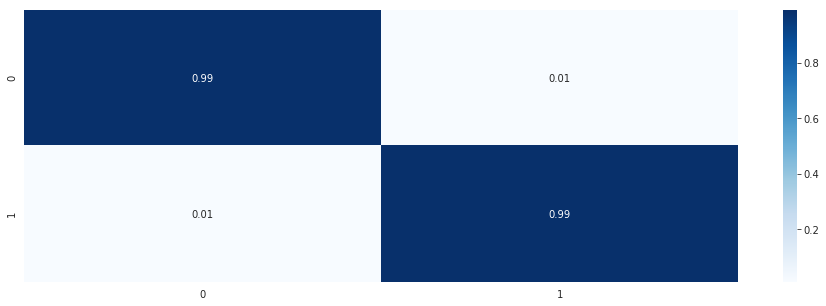

In [11]:
f = plt.subplots(1, 1, figsize=(16, 5), sharex=True)
train_cnf_matrix = confusion_matrix(train['target'], [np.round(x) for x in train['preds_avg']])
train_cnf_matrix_norm = train_cnf_matrix / train_cnf_matrix.sum(axis=1)[:, np.newaxis]
train_df_cm = pd.DataFrame(train_cnf_matrix_norm, index=[0, 1], columns=[0, 1])
sns.heatmap(train_df_cm, annot=True, fmt='.2f', cmap="Blues")
plt.show()

## Metrics ROC AUC

In [12]:
print('QDA VT Stdv         %.5f' % roc_auc_score(train['target'], train['preds_vt_stdv']))
print('QDA VT MinMax       %.5f' % roc_auc_score(train['target'], train['preds_vt_minmax']))
print('QDA VT              %.5f' % roc_auc_score(train['target'], train['preds_vt_ns']))
print('QDA Stdv            %.5f' % roc_auc_score(train['target'], train['preds_stdv']))
print('QDA MinMax          %.5f' % roc_auc_score(train['target'], train['preds_minmax']))
print('QDA                 %.5f' % roc_auc_score(train['target'], train['preds_ns']))
print('Averaged not VT AUC %.5f' % roc_auc_score(train['target'], train['preds_avg_vt']))
print('Averaged VT AUC     %.5f' % roc_auc_score(train['target'], train['preds_avg_nvt']))
print('Averaged AUC        %.5f' % roc_auc_score(train['target'], train['preds_avg']))

QDA VT Stdv         0.99491
QDA VT MinMax       0.99491
QDA VT              0.99491
QDA Stdv            1.00000
QDA MinMax          1.00000
QDA                 1.00000
Averaged not VT AUC 0.99491
Averaged VT AUC     1.00000
Averaged AUC        0.99977


### Test set with all models predictions

In [13]:
test[['id', 'target_avg', 'target_avg_vt', 'target_avg_nvt', 'target_vt_stdv', 'target_vt_minmax', 'target_vt_ns', 'target_stdv', 'target_minmax', 'target_ns']].head()

,id,target_avg,target_avg_vt,target_avg_nvt,target_vt_stdv,target_vt_minmax,target_vt_ns,target_stdv,target_minmax,target_ns
0,1c13f2701648e0b0d46d8a2a5a131a53,0.781810,0.996953,0.556667,0.996953,0.996953,0.996953,0.666667,1.000000,0.000000
1,ba88c155ba898fc8b5099893036ef205,0.722082,0.884164,0.556667,0.884164,0.884164,0.884164,0.666667,0.666667,0.333333
2,7cbab5cea99169139e7e6d8ff74ebb77,0.166675,0.000016,0.333333,0.000016,0.000016,0.000016,0.333333,0.333333,0.333333
3,ca820ad57809f62eb7b4d13f5d4371a0,0.314573,0.295813,0.333333,0.295813,0.295813,0.295813,0.333333,0.333333,0.333333
4,7baaf361537fbd8a1aaa2c97a6d4ccc7,0.331269,0.335871,0.330000,0.335871,0.335871,0.335871,0.000000,0.333333,0.666667


# Test predictions
Now you can output predictions for each individual model and the ensembled models as well.

#### Averaged models submission

In [14]:
submission = test[['id', 'target_avg']]
submission.columns = ['id', 'target']
submission.to_csv('submission_avg.csv', index=False)
submission.head()

,id,target
0,1c13f2701648e0b0d46d8a2a5a131a53,0.781810
1,ba88c155ba898fc8b5099893036ef205,0.722082
2,7cbab5cea99169139e7e6d8ff74ebb77,0.166675
3,ca820ad57809f62eb7b4d13f5d4371a0,0.314573
4,7baaf361537fbd8a1aaa2c97a6d4ccc7,0.331269


In [15]:
submission = test[['id', 'target_avg_vt']]
submission.columns = ['id', 'target']
submission.to_csv('submission_avg_vt.csv', index=False)
submission.head()

,id,target
0,1c13f2701648e0b0d46d8a2a5a131a53,0.996953
1,ba88c155ba898fc8b5099893036ef205,0.884164
2,7cbab5cea99169139e7e6d8ff74ebb77,0.000016
3,ca820ad57809f62eb7b4d13f5d4371a0,0.295813
4,7baaf361537fbd8a1aaa2c97a6d4ccc7,0.335871


In [16]:
submission = test[['id', 'target_avg_nvt']]
submission.columns = ['id', 'target']
submission.to_csv('submission_avg_nvt.csv', index=False)
submission.head()

,id,target
0,1c13f2701648e0b0d46d8a2a5a131a53,0.556667
1,ba88c155ba898fc8b5099893036ef205,0.556667
2,7cbab5cea99169139e7e6d8ff74ebb77,0.333333
3,ca820ad57809f62eb7b4d13f5d4371a0,0.333333
4,7baaf361537fbd8a1aaa2c97a6d4ccc7,0.330000


In [17]:
submission = test[['id', 'target_vt_stdv']]
submission.columns = ['id', 'target']
submission.to_csv('submission_vt_stdv.csv', index=False)
submission.head()

,id,target
0,1c13f2701648e0b0d46d8a2a5a131a53,0.996953
1,ba88c155ba898fc8b5099893036ef205,0.884164
2,7cbab5cea99169139e7e6d8ff74ebb77,0.000016
3,ca820ad57809f62eb7b4d13f5d4371a0,0.295813
4,7baaf361537fbd8a1aaa2c97a6d4ccc7,0.335871


In [18]:
submission = test[['id', 'target_vt_minmax']]
submission.columns = ['id', 'target']
submission.to_csv('submission_vt_minmax.csv', index=False)
submission.head()

,id,target
0,1c13f2701648e0b0d46d8a2a5a131a53,0.996953
1,ba88c155ba898fc8b5099893036ef205,0.884164
2,7cbab5cea99169139e7e6d8ff74ebb77,0.000016
3,ca820ad57809f62eb7b4d13f5d4371a0,0.295813
4,7baaf361537fbd8a1aaa2c97a6d4ccc7,0.335871


In [19]:
submission = test[['id', 'target_vt_ns']]
submission.columns = ['id', 'target']
submission.to_csv('submission_vt_ns.csv', index=False)
submission.head()

,id,target
0,1c13f2701648e0b0d46d8a2a5a131a53,0.996953
1,ba88c155ba898fc8b5099893036ef205,0.884164
2,7cbab5cea99169139e7e6d8ff74ebb77,0.000016
3,ca820ad57809f62eb7b4d13f5d4371a0,0.295813
4,7baaf361537fbd8a1aaa2c97a6d4ccc7,0.335871


In [20]:
submission = test[['id', 'target_stdv']]
submission.columns = ['id', 'target']
submission.to_csv('submission_stdv.csv', index=False)
submission.head()

,id,target
0,1c13f2701648e0b0d46d8a2a5a131a53,0.666667
1,ba88c155ba898fc8b5099893036ef205,0.666667
2,7cbab5cea99169139e7e6d8ff74ebb77,0.333333
3,ca820ad57809f62eb7b4d13f5d4371a0,0.333333
4,7baaf361537fbd8a1aaa2c97a6d4ccc7,0.000000


In [21]:
submission = test[['id', 'target_minmax']]
submission.columns = ['id', 'target']
submission.to_csv('submission_minmax.csv', index=False)
submission.head()

,id,target
0,1c13f2701648e0b0d46d8a2a5a131a53,1.000000
1,ba88c155ba898fc8b5099893036ef205,0.666667
2,7cbab5cea99169139e7e6d8ff74ebb77,0.333333
3,ca820ad57809f62eb7b4d13f5d4371a0,0.333333
4,7baaf361537fbd8a1aaa2c97a6d4ccc7,0.333333


In [22]:
submission = test[['id', 'target_ns']]
submission.columns = ['id', 'target']
submission.to_csv('submission_ns.csv', index=False)
submission.head()

,id,target
0,1c13f2701648e0b0d46d8a2a5a131a53,0.000000
1,ba88c155ba898fc8b5099893036ef205,0.333333
2,7cbab5cea99169139e7e6d8ff74ebb77,0.333333
3,ca820ad57809f62eb7b4d13f5d4371a0,0.333333
4,7baaf361537fbd8a1aaa2c97a6d4ccc7,0.666667
